In [3]:
#Deze comands importeren alle packeges die nodig zijn om de juiste functies te gebruiken
import matplotlib.pyplot as plt
import sounddevice as sd
import numpy as np
from mijngeluid import fft_partitioned

In [4]:
sd.query_devices() #Laat zien welke audio appperaten aanwezig zijn op je laptop.

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Microphone Array (Intel® Smart , MME (4 in, 0 out)
   2 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  3 Speakers (Realtek(R) Audio), MME (0 in, 2 out)
   4 Hoofdtelefoon (), Windows WDM-KS (0 in, 2 out)
   5 Microfoon (Realtek HD Audio Mic input), Windows WDM-KS (2 in, 0 out)
   6 Speakers 1 (Realtek HD Audio output with SST), Windows WDM-KS (0 in, 2 out)
   7 Speakers 2 (Realtek HD Audio output with SST), Windows WDM-KS (0 in, 2 out)
   8 Pc-luidspreker (Realtek HD Audio output with SST), Windows WDM-KS (2 in, 0 out)
   9 Headphones 1 (Realtek HD Audio 2nd output with SST), Windows WDM-KS (0 in, 2 out)
  10 Headphones 2 (Realtek HD Audio 2nd output with SST), Windows WDM-KS (0 in, 2 out)
  11 Pc-luidspreker (Realtek HD Audio 2nd output with SST), Windows WDM-KS (2 in, 0 out)
  12 Stereo-mix (Realtek HD Audio Stereo input), Windows WDM-KS (2 in, 0 out)
  13 Microfoonmatrix 1 (Intel® Smart Sound Technologie microfoon), 

In [14]:
#Code om geluid op te nemen
#fs is het aantal sampels per seconden
fs = 44100

#Hoelang de microfoon moet opnemen
duration = 6

#Defineer wat de arr word
#sd.rec is een opneem comand, vervolgens worden het antal sampels dat moet worden opgenomen, dan heet aantal sampels per seconde,
#dan hoeveel geluid golven, dan wat voor type geluid en welk apparaat moet gaan opnemen

arr = sd.rec(int((duration * fs)), samplerate=fs, channels=2, dtype='float32', device=1)

#wacht tot de opname klaar is
sd.wait()

#laat de vorm van de array zien
arr.shape

(264600, 2)

In [ ]:
#Dit laat het opgenomen geluid afspelen
sd.play(arr)

In [15]:
#df doet een fast fourier transformatie over de opname
df = fft_partitioned(arr[:,0], fs, duration, t_bin=1e-2)

#isoleert een bepaald freuentiebereik.
df2 = df[df['f'].between(10000, 10100)] 

#laat df2 zien
df2 

,t,f,I
100,0.01,10068.493151,1.280335e-06
100,0.02,10068.493151,6.848438e-07
100,0.03,10068.493151,2.394740e-06
100,0.04,10068.493151,1.275114e-06
100,0.05,10068.493151,1.092148e-06
...,...,...,...
100,5.96,10068.493151,1.944000e-05
100,5.97,10068.493151,2.357406e-06
100,5.98,10068.493151,5.214133e-06
100,5.99,10068.493151,1.125169e-05


Text(0, 0.5, 'Geluidssterkte [dB] ')

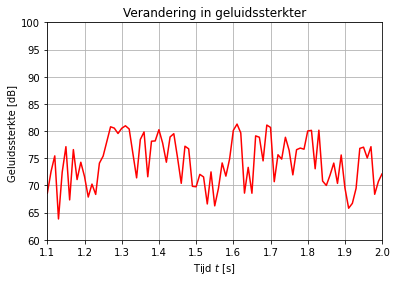

In [25]:
#plot de grafiek met tijd tegenover gluidssterkte
plt.plot(df2.t, 10 * np.log10(df2.I/10**-12), 'r-')

#Maakt een rooster
plt.grid()

#limieteerd de x en y-as
plt.ylim(60, 100)
plt.xlim(1.1, 2)

#veranderd de titel van de grafiek
plt.title(r"Verandering in geluidssterkter")

#Geeft de x en y-as een titel
plt.xlabel(r"Tijd $t$ [s]")
plt.ylabel(r"Geluidssterkte [dB] ")